# Introduction
We will study the sales data of one of the largest retailers in the world. Let's figure out what factors influence its revenue. Can factors such as air temperature and fuel cost influence the success of a huge company along with the purchasing power index and seasonal discounts? And how does machine learning minimize costs and increase economic impact?

The data contains the following columns:

*   Store: Store number
*   Date: Sales week start date
*   Weekly_Sales: Sales
*   Holiday_Flag: Mark on the presence or absence of a holiday
*   Temperature: Air temperature in the region
*   Fuel_Price: Fuel cost in the region
*   CPI: Consumer price index
*   Unemployment: Unemployment rate

Step 1: Importing dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Walmart_Sales.csv')
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

Step 2: Data cleaning

In [5]:
#Drop NaN values from DataFrame
df= df.dropna()
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [6]:
#type of columns
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [7]:
from IPython.display import display
display(df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Step 3: Analyze data

In [15]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Month'] = df['Date'].dt.month # create month column
df['Year'] = df['Date'].dt.year #create year column

# Groupby Month, Year and Store
monthly_df = df.groupby(['Store', 'Year', 'Month']).agg({
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Holiday_Flag': 'max'
}).reset_index()
#change Weekly_Sales into Monthly_Sales
monthly_df = monthly_df.rename(columns={'Weekly_Sales': 'Monthly_Sales'})
display(monthly_df)

,Store,Year,Month,Monthly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag
0,1,2010,2,6307344.10,41.8450,2.54875,211.236828,8.106,1
1,1,2010,3,5871293.98,52.5800,2.68600,211.241116,8.106,0
2,1,2010,4,7422801.92,65.3400,2.77440,210.552135,7.808,0
3,1,2010,5,5929938.64,76.0525,2.81850,210.547812,7.808,0
4,1,2010,6,6084081.46,82.3925,2.66575,211.356237,7.808,0
...,...,...,...,...,...,...,...,...,...
1480,45,2012,6,4049712.68,72.0300,3.62420,191.043707,8.567,0
1481,45,2012,7,3042463.41,79.7625,3.55300,191.158753,8.684,0
1482,45,2012,8,3633793.89,75.7300,3.77680,191.272273,8.684,0
1483,45,2012,9,2905011.08,68.4425,3.97350,191.786947,8.684,1


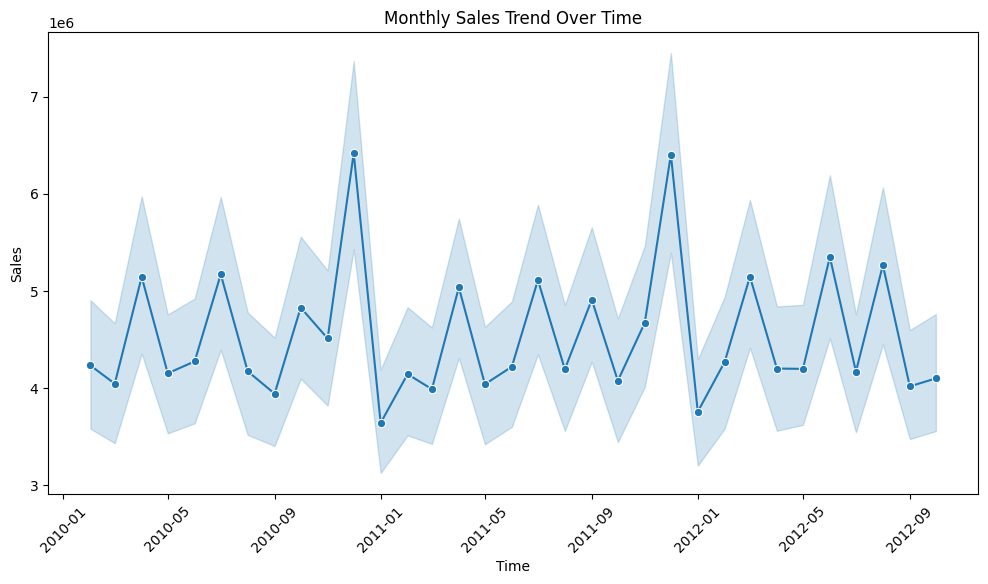

In [17]:
# Combine Year and Month into a datetime column
monthly_df['YearMonth'] = monthly_df['Year'].astype(str) + '-' + monthly_df['Month'].astype(str)
monthly_df['YearMonth'] = pd.to_datetime(monthly_df['YearMonth'], format='%Y-%m')

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Monthly_Sales', data=monthly_df, marker='o')
plt.title('Monthly Sales Trend Over Time')  # Title in English
plt.xlabel('Time')                          # X-axis label in English
plt.ylabel('Sales')                         # Y-axis label in English
plt.xticks(rotation=45)
plt.show()



Based on the chart, December consistently demonstrates the highest sales, while January exhibits the lowest sales annually. September 2010 and September 2012 recorded relatively low sales levels, whereas September 2011 reflected sales comparable to the other months.

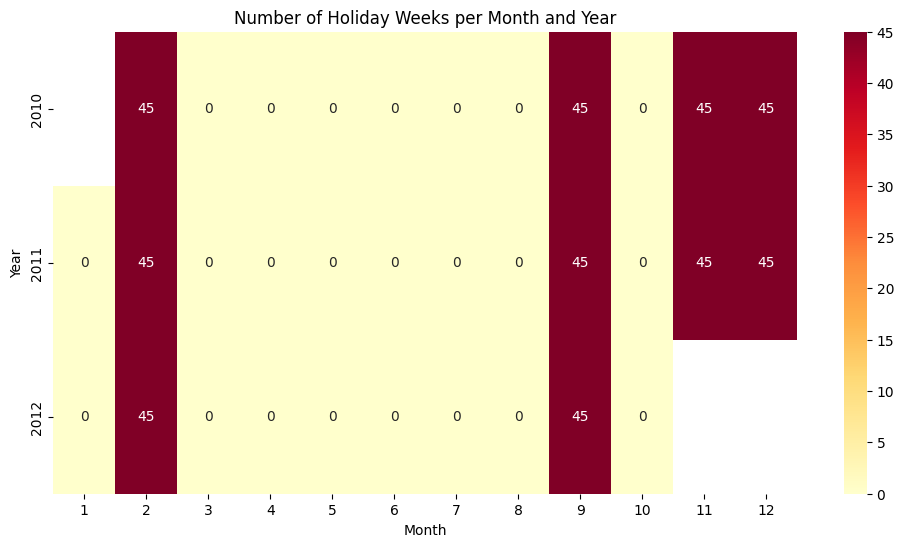

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total number of holiday weeks by Year and Month
holiday_monthly = monthly_df.groupby(['Year', 'Month'])['Holiday_Flag'].sum().reset_index()

# Pivot the data: rows = Year, columns = Month, values = Holiday_Flag
holiday_pivot = holiday_monthly.pivot(index='Year', columns='Month', values='Holiday_Flag')

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    holiday_pivot,       # Data for heatmap
    annot=True,          # Show values in each cell
    fmt='.0f',           # Float format
    cmap='YlOrRd'        # Color map
)
plt.title('Number of Holiday Weeks per Month and Year')  # Title in English
plt.xlabel('Month')                                     # X-axis label
plt.ylabel('Year')                                      # Y-axis label
plt.show()


Based on the data, February, September, and December are identified as the months with holidays (the value 45 represents the total number of holiday occurrences across 45 stores within the respective month), whereas the other months do not contain any holidays.

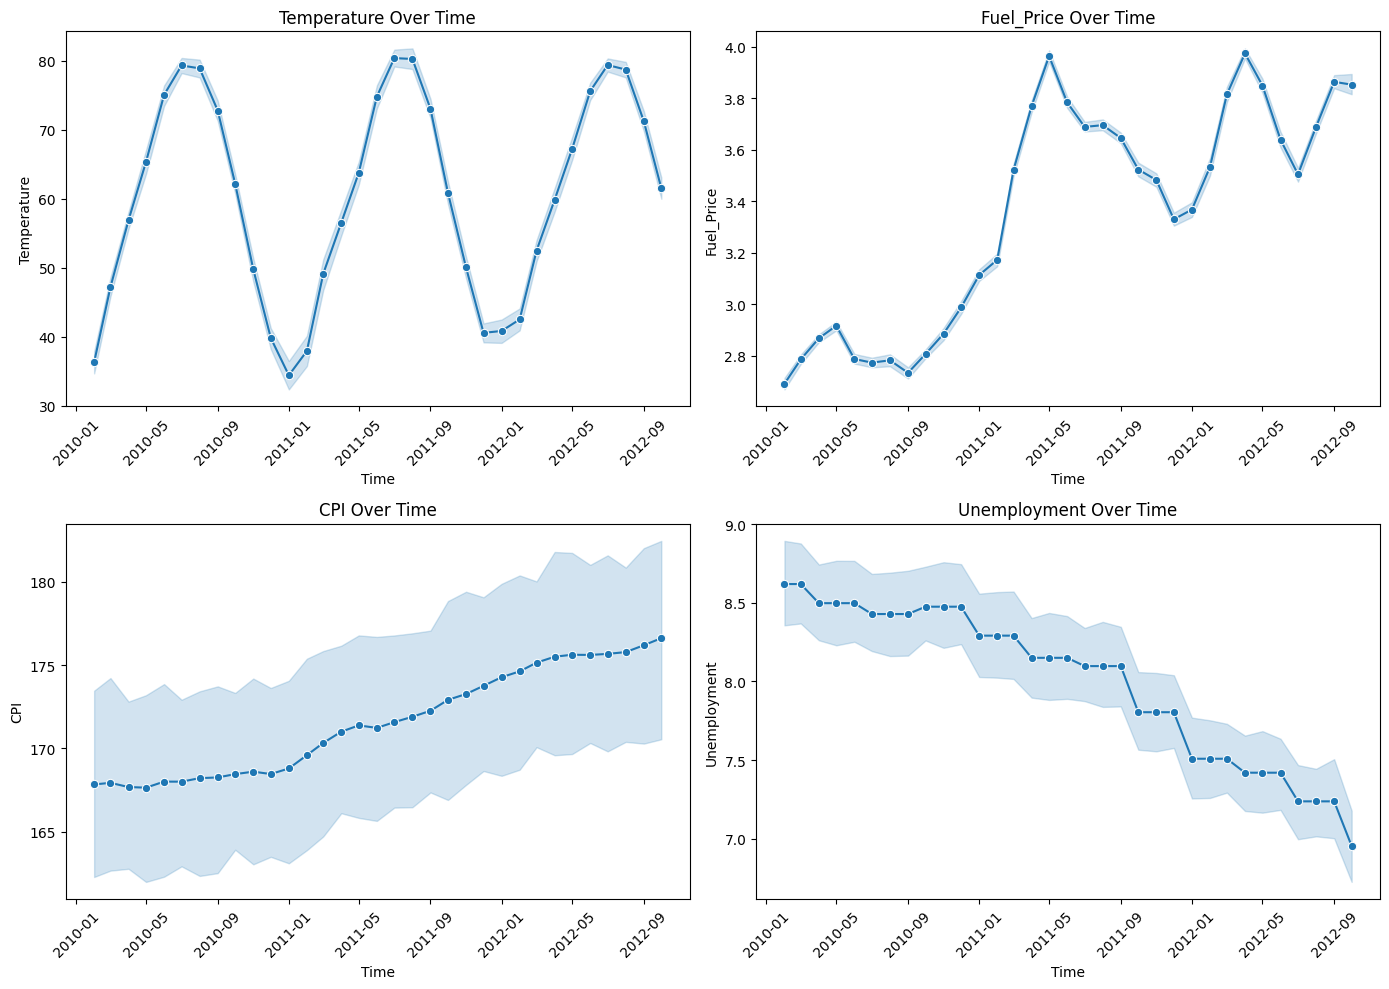

In [22]:
# Create a 'YearMonth' column for timeline visualization
df['YearMonth'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

variables = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(14,10))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    # Plot variable over time
    sns.lineplot(x='YearMonth', y=var, data=df, marker='o')
    plt.title(f'{var} Over Time')   # Title in English
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.xticks(rotation=45)         # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

*   Chart 1 illustrates that December records an average temperature of ~ 40, rendering it highly suitable for outdoor activities. January demonstrates temperatures ranging from the lowest to the average, whereas September experiences comparatively high temperatures.
*   Chart 2 presents fuel prices over time. Fuel prices exhibit a year-on-year upward trend while demonstrating fluctuations across individual months within each year. Prices in January and December remain consistently lower relative to other months. Notably, September 2010 recorded comparatively low fuel prices, whereas September 2011 and September 2012 registered relatively high fuel prices.
*   Chart 3 demonstrates a steady increase in the Consumer Price Index (CPI) over the years, whereas Chart 4 illustrates a declining trend in the unemployment rate. These observations indicate that neither CPI nor unemployment exhibits a discernible correlation with the fluctuating monthly sales.

# Conclusion
*   December: December consistently records the highest sales, largely driven by the holiday season, including Christmas and year-end celebrations. Increased consumer spending on gifts, festive activities, and retailer promotions significantly boosts demand. Moderate average temperatures (~40, Chart 1) make outdoor shopping more favorable, while fuel prices remain relatively low (Chart 2), further supporting consumer mobility and spending. The combined effect of holidays, favorable weather, and lower fuel costs contributes to December’s peak sales performance.

*   January: In contrast, January exhibits the lowest sales annually, primarily due to a post-holiday decline in consumer expenditures. Following the intense spending period of December, shoppers tend to reduce discretionary purchases, and promotional activities by retailers are limited. Additionally, January experiences lower to average temperatures (Chart 1), which may deter outdoor shopping. Fuel prices are also relatively low (Chart 2), but the seasonal reduction in demand dominates, resulting in lower overall sales.

*   September: September shows relatively low sales, influenced by seasonal shifts in consumer behavior and specific economic factors. While back-to-school spending occurs, it is concentrated on select categories and does not offset general retail activity. September temperatures are comparatively high (Chart 1), which may impact shopping patterns for outdoor-oriented products. Fuel prices in September 2011, and 2012 were comparatively high (Chart 2), potentially constraining discretionary spending. The combination of seasonal demand patterns, elevated temperatures, and higher fuel costs in certain years contributes to September’s lower sales levels.